# #1. Advanced basics

0. [Motivation](#Motivation)
1. [Unicode](#Unicode)
    1. [UTF-8](#UTF-8)
    2. [Python 2](#Python-2)
    3. [Python 3](#Python-3)
2. [Floating point numbers](#Floating-point-numbers)
    1. [Leaky abstraction](#Leaky-abstraction)
    2. [IEEE-754](#IEEE-754)
    3. [Error accumulation](#Error-accumulation)
    4. [Rounding error](#Rounding-error)
    5. [Equality Test](#Equality-Test)
    6. [Subtraction](#Subtraction)
    7. [Decimal](#Decimal)
    8. [NaN and Infinity](#NaN-and-Infinity)
3. [Itertools](#Itertools)
    1. [Iterable](#Iterable)
        1. [Iterator](#Iterator)
        2. [Iterator protocol](#Iterator-protocol)
        3. [Sequence protocol](#Sequence-protocol)
    2. [Generator](#Generator)
        1. [Expressions](#Expressions)
        2. [Pipelines](#Pipelines)
        3. [Coroutines](#Coroutines)
    3. [Itertools review](#Itertools-review)
4. [Functional programming](#Functional-programming)
    1. [Origins](#Origins)
    2. [Recursion](#Recursion)
        1. [Visualization](#Visualization)
        2. [Limitations](#Limitations)
        3. [TCO](#TCO)
    3. [Closures](#Closures)
        1. [LEGB](#LEGB)
        2. [Closures](#Closures)
        3. [Late binding](#Late-binding)
5. [Decorators](#Decorators)
    1. [Passing arguments](#Passing-arguments)
    2. [Decorator class](#Decorator-class)
    3. [Standard decorators](#Standard-decorators)
    4. [Decorator with arguments](#Decorator-with-arguments)
    5. [Multiple decorators](#Multiple-decorators)
    6. [functools](#functools)


## Motivation

__Goal__

На более глубоком уровне рассмотреть некоторые базовые аспекты, указать на проблемные места, исправить неверное понимание основных составляющих языка, конвертировать полученные знания в практический навык

__Homework__

Log Analyzer

## Unicode

Миф: Unicode это 16-битовая кодировка, в ней возможно представить 65536 символов

* Структура:
    1. Character: Cyrillic Capital Letter Ya
    2. Glyph: Я
    3. Code point: U+042F
    4. Encodings: UTF-8, UTF-16, UTF-7, UCS-4 и т.д.


* 1.1 млн. code point'ов, 110к назначено 

#### UTF-8

* Каждый code point от 0 до 127 хранится в 1 байте
* code point старше 127 хранятся в 2, 3, 4 байтах
* Совместимо с ASCII

#### Python 2

In [1]:
import os

#### Source code literals

In [4]:
# -*- coding: utf-8 -*-

#### str and unicode

* str - последовательность байт, байтовая строка
* unicode - последовательность code point'ов

In [5]:
byte_string = "Hello world"
print(type(byte_string))

unicode_string = u"Hello \u2119\u01b4\u2602\u210c\xf8\u1f24"
print(type(unicode_string))

<type 'str'>
<type 'unicode'>


#### Взаимное преобразование
* unicode .encode -> bytes
* bytes   .decode -> unicode

In [2]:
unicode_string = u"Hello \u2119\u01b4\u2602\u210c\xf8\u1f24"
print(len(unicode_string), repr(unicode_string))

utf8_string = unicode_string.encode("utf-8")
print(len(utf8_string), repr(utf8_string))
print(repr(utf8_string.decode("utf-8")))

12 'Hello ℙƴ☂ℌøἤ'
22 b'Hello \xe2\x84\x99\xc6\xb4\xe2\x98\x82\xe2\x84\x8c\xc3\xb8\xe1\xbc\xa4'
'Hello ℙƴ☂ℌøἤ'


In [3]:
print(unicode_string.encode("ascii", "replace"))
print(unicode_string.encode("ascii", "xmlcharrefreplace"))  # may be useful when reading db with unknown encodings
print(unicode_string.encode("ascii", "ignore"))

b'Hello ??????'
b'Hello &#8473;&#436;&#9730;&#8460;&#248;&#7972;'
b'Hello '


In [11]:
print(utf8_string.decode("ascii", "replace"))
print(utf8_string.decode("ascii", "ignore"))

Hello ����������������
Hello 


#### Coercion

In [12]:
import sys
print(sys.getdefaultencoding())

ascii


In [13]:
u"Hello" + " Otus"  # unicode string + byte string. Otus is trivially being decoded in codepositive string

u'Hello Otus'

In [14]:
u"Hello" + " Otus".decode("ascii")  # what exactly happened at previous line

u'Hello Otus'

In [15]:
utf8_string = u"Отус!".encode("utf-8")  # case when decoding is going not trivial way
u" Hello " +  utf8_string

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd0 in position 0: ordinal not in range(128)

In [16]:
u" Hello " +  utf8_string.decode("ascii")  # notice that error doesn't connected with real reason
# Python trying to decode to ascii by default before encode again in unicode

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd0 in position 0: ordinal not in range(128)

In [17]:
unicode_string = u"Отус"
byte_string = "Otus"

print(repr("Title: %s" % unicode_string))
print(repr(u"Title: %s" % byte_string))

u'Title: \u041e\u0442\u0443\u0441'
u'Title: Otus'


In [18]:
utf8_string = u"Отус".encode("utf-8")
print(utf8_string.encode("utf-8"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd0 in position 0: ordinal not in range(128)

In [20]:
fn = "tmp.txt"
with open(fn, "w") as fp:
    fp.write(unicode_string)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 0-3: ordinal not in range(128)

In [21]:
os.remove(fn)

#### codecs

In [22]:
import io
f = io.open('test', encoding='utf-8', mode='w+')
f.write(u'\u4500 blah blah blah\n')
f.seek(0)
print(repr(f.readline()[:1]))
f.close()
os.remove("test")

u'\u4500'


#### Filenames

In [23]:
fn = u'filename\u4500abc'
f = open(fn, 'w')
f.close()
print(os.stat(fn))

posix.stat_result(st_mode=33188, st_ino=256457992, st_dev=16777220, st_nlink=1, st_uid=502, st_gid=20, st_size=0, st_atime=1499449844, st_mtime=1499449844, st_ctime=1499449844)


In [24]:
print(os.listdir('.'))
print(os.listdir(u'.'))
os.remove(fn) # cleanup

['.DS_Store', '.ipynb_checkpoints', 'deco.py', 'filename\xe4\x94\x80abc', 'lection1_notes.ipynb', 'log_analyzer.py', 'nginx-access-ui.log-20170630.gz', 'poker.py', 'report-2017.06.30.html', 'report.html']
[u'.DS_Store', u'.ipynb_checkpoints', u'deco.py', u'filename\u4500abc', u'lection1_notes.ipynb', u'log_analyzer.py', u'nginx-access-ui.log-20170630.gz', u'poker.py', u'report-2017.06.30.html', u'report.html']


#### Python 3

In [1]:
import sys, locale

expressions = """
        locale.getpreferredencoding()
        type(my_file)
        my_file.encoding
        sys.stdout.isatty()
        sys.stdout.encoding
        sys.stdin.isatty()
        sys.stdin.encoding
        sys.stderr.isatty()
        sys.stderr.encoding
        sys.getdefaultencoding()
        sys.getfilesystemencoding()
    """

my_file = open('dummy', 'w')

for expression in expressions.split():
    value = eval(expression)
    print(expression.rjust(30), '->', repr(value))

 locale.getpreferredencoding() -> 'UTF-8'
                 type(my_file) -> <class '_io.TextIOWrapper'>
              my_file.encoding -> 'UTF-8'
           sys.stdout.isatty() -> False
           sys.stdout.encoding -> 'UTF-8'
            sys.stdin.isatty() -> False
            sys.stdin.encoding -> 'UTF-8'
           sys.stderr.isatty() -> False
           sys.stderr.encoding -> 'UTF-8'
      sys.getdefaultencoding() -> 'utf-8'
   sys.getfilesystemencoding() -> 'utf-8'


* If you omit the `encoding` argument when opening a file, the default is given by `locale.getpreferredencoding() `
* The encoding of sys.stdout/stdin/stderr is given by the `PYTHONIOENCODING` environment variable, if present, otherwise it is either inherited from the console or defined by `locale.getpreferredencoding()` if the output/input is redirected to/from a file.
* `sys.getdefaultencoding()` is used internally by Python to convert binary data to/ from str; this happens less often in Python 3, but still happens. Changing this setting is not supported.
* `sys.getfilesystemencoding()` is used to encode/decode filenames (not file contents). It is used when open() gets a str argument for the filename; if the filename is given as a bytes argument, it is passed unchanged to the OS API

The most important encoding setting is that returned by `locale.getpreferredencoding()`: it is the default for opening text files and for sys.stdout/stdin/ stderr when they are redirected to files

In [45]:
cafe = bytes('café', encoding='utf_8')
cafe

b'cafe\xcc\x81'

In [46]:
print(cafe[0])
print(cafe[:1])

99
b'c'


In [50]:
cafe_arr = bytearray(cafe)
print(cafe_arr)
cafe_arr[-1:]

bytearray(b'cafe\xcc\x81')


bytearray(b'\x81')

In [52]:
with open('test', encoding='utf-8', mode='w+') as f:
    f.write('\u4500 blah blah blah\n')
    f.seek(0)
    print(repr(f.readline()[:1]))

'䔀'


### Summary

* Код должен внутри работать с unicode'ом, а на входе/выходе должен декодировать/кодирать определенный формат
* Включать в тесты символы > 127
* Не существует такой вещи, как plain text. Нужно знать кодировку
* В Python 2.x str - это байтовая строка, а unicode - это последовательность codepoint'ов
* Python 2.x осуществляют перекодировку неявно в некоторых случаях
* Python 3.x ставит все на свои места

### References

* https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/
* https://docs.python.org/2/howto/unicode.html
* https://habrahabr.ru/post/135913/
* https://us.pycon.org/2013/schedule/presentation/45/
* https://shkspr.mobi/blog/2017/05/unicode-is-hard/
* https://realpython.com/python-encodings-guide/
* https://changelog.complete.org/archives/9938-the-python-unicode-mess
* https://www.b-list.org/weblog/2017/sep/05/how-python-does-unicode/

## Floating point numbers

#### Leaky abstraction

* вещестевенные числа бесконечны, в отличие от компьютерной памяти
* вычитание
* overflow underflow

In [26]:
0.1 + 0.2

0.30000000000000004

1/8
    * 0.125 = 1/10 + 2/100 + 5/1000
    * 0.01 = 0/2 + 0/4 + 1/8

1/3 в десятичном виде?
1/10 в двоичном виде?

#### IEEE-754

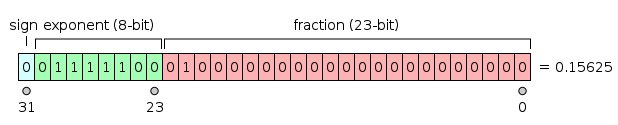

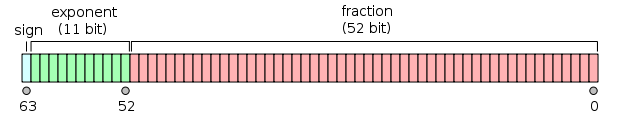

#### Error accumulation

In [27]:
s = 0.0
for i in range(10):
    s += 0.1
s

0.9999999999999999

#### Rounding error

In [28]:
round(2.675, 2)

2.67

#### Equality Test

In [29]:
def square_root_NR(x, epsilon):
    """Assumes x >= 0 and epsilon > 0. Return y s.t. y*y is within epsilon of x"""
    assert x >= 0, 'x must be non-negative, not %s' % x
    assert epsilon > 0, 'epsilon must be positive, not %s' % epsilon
    x = float(x)
    guess = x / 2.0
    diff = guess**2 - x
    ctr = 1
    # cannot use guess**2 == x
    while abs(diff) > epsilon and ctr <= 100:
        guess = guess - diff / (2.0 * guess)
        diff = guess**2 - x
        ctr += 1
    assert ctr <= 100, 'Iteration count exceeded'
    print('NR method.  Num. iterations:', ctr, 'Estimate:', guess)
    return guess

square_root_NR(2, 1e-06)

NR method.  Num. iterations: 5 Estimate: 1.41421356237


1.4142135623746899

https://github.com/jtsiomb/kdtree/blob/master/kdtree.c#L273

#### Subtraction

In [30]:
import math

# derivative of sin(x) at x = 1
for i in range(1, 21):
    h = 10.0 ** -i
    print((math.sin(1.0 + h) - math.sin(1.0)) / h)

print("True result: %f" % math.cos(1.0))

0.497363752535
0.536085981012
0.53988148036
0.540260231419
0.540298098506
0.540301885121
0.54030226404
0.540302291796
0.540302358409
0.540302247387
0.540301137164
0.540345546085
0.539568389968
0.53290705182
0.555111512313
0.0
0.0
0.0
0.0
0.0
True result: 0.540302


#### Decimal

In [32]:
from decimal import Decimal
Decimal(0.1)

Decimal('0.1000000000000000055511151231257827021181583404541015625')

In [9]:
%%time
from decimal import Decimal

a = 0

for i in range(2, 100000):
  a = Decimal('%d.%d' % (i, i)) / Decimal('%d.%d' % (i - 1, i - 1))
print(a)

1.000010000200004000080001600
CPU times: user 6.59 s, sys: 194 ms, total: 6.78 s
Wall time: 15.4 s


In [10]:
%%time
from decimal import Decimal

a = 0

for i in range(2, 100000):
  a = float('%d.%d' % (i, i)) / float('%d.%d' % (i - 1, i - 1))
print(a)

1.0000100002
CPU times: user 527 ms, sys: 11 ms, total: 538 ms
Wall time: 1.01 s


#### NaN and Infinity

In [33]:
import math
r = float("inf") / float("-inf")
print(r, math.isnan(r))

nan True


### Summary

* с float'ами могут возникать потери точности
* для денег и подобного полезен Decimal
* не сравнивайте и float'ы!

### References

* https://www.johndcook.com/blog/2009/04/06/numbers-are-a-leaky-abstraction/
* http://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html
* https://docs.python.org/2/tutorial/floatingpoint.html
* https://www.codeproject.com/Articles/25294/Avoiding-Overflow-Underflow-and-Loss-of-Precision

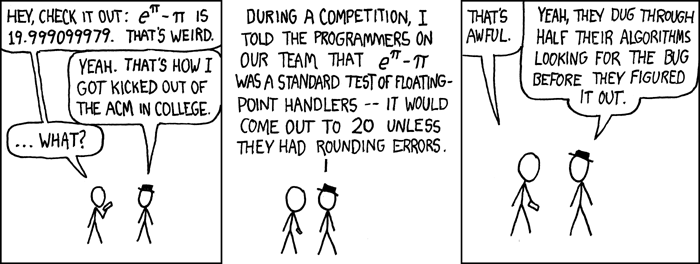

## Itertools

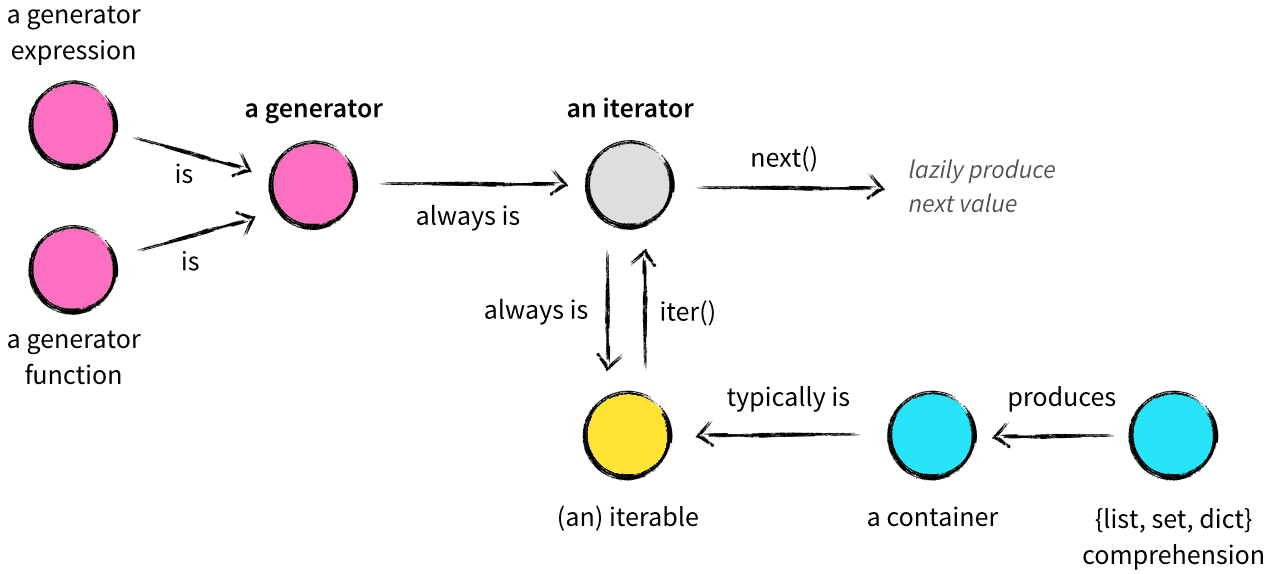

#### Iterable

Объект, способный возвращать элементы по одному
* у него есть \_\_iter\_\_() (iterator protocol) или \_\_getitem\_\_() (sequence protocol)
* вызов iter() превращает в итератор
* for вызывает iter() неявно, сохраняет итератор в безымянной переменной

#### Iterator

Объект, представляющий последовательность данных
* есть \_\_iter\_\_(), который возвращает себя же
* iterator тоже iterable
* оканчивается после raise StopIteration
* iter() возвращает свежий итератор для iterable, но "выдохшийся" - для iterator'а

In [4]:
x = iter([1, 2, 3])
print(x)
print(x.__next__())
print(x.__next__())
print(x.__next__())
print(x.__next__())

1
2
3


StopIteration: 

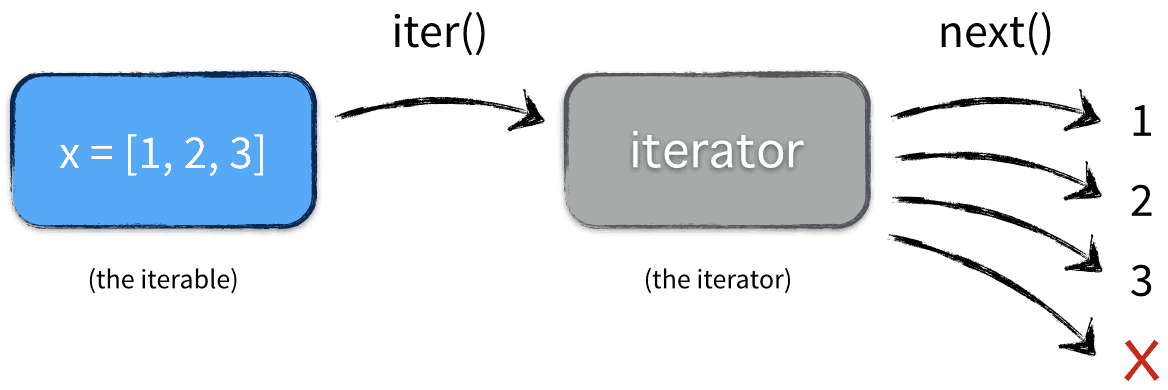

In [3]:
import itertools

class Node:
    def __init__(self, value):
        self._value = value
        self._children = []

    def __str__(self):
        return 'Node(%s)' % self._value

    def add_child(self, node):
        self._children.append(node)

    def __iter__(self):
        return iter(self._children)

    def depth_first(self):
        return itertools.chain([self], *[c.depth_first() for c in self])


root = Node(0)
child1 = Node(1)
child2 = Node(2)
root.add_child(child1)
root.add_child(child2)
child1.add_child(Node(3))
child1.add_child(Node(4))
child2.add_child(Node(5))

for ch in root.depth_first():
    print(ch)

Node(0)
Node(1)
Node(3)
Node(4)
Node(2)
Node(5)


#### Iterator protocol

* iterator.\_\_iter_\_(). Возвращает self
* iterator.\_\_next_\_(). Возвращает следующий эелемент, в конце кидает StopIteration

In [36]:
class Node:
    def __init__(self, value):
        self._value = value
        self._children = []
        
    def __str__(self):
        return 'Node(%s)' % self._value

    def add_child(self, other_node):
        self._children.append(other_node)

    def __iter__(self):
        return iter(self._children)

    def depth_first(self):
        return DepthFirstIterator(self)


class DepthFirstIterator:
    '''
    Depth-first traversal
    '''
    def __init__(self, start_node):
        self._node = start_node
        self._children_iter = None
        self._child_iter = None

    def __iter__(self):
        return self

    def __next__(self):
        # Return myself if just started; create an iterator for children
        if self._children_iter is None:
            self._children_iter = iter(self._node)
            return self._node

        # If processing a child, return its next item
        elif self._child_iter:
            try:
                nextchild = next(self._child_iter)
                return nextchild
            except StopIteration:
                self._child_iter = None
                return next(self)

        # Advance to the next child and start its iteration
        else:
            self._child_iter = next(self._children_iter).depth_first()

            return next(self)

#### Sequence protocol

* sequence.\_\_getitem\_\_(). Получает на вход индекс или slice, возвращает нужные элемент(ы). Кидает IndexError, если нет такого элемента
* sequence.\_\_len\_\_(). Возвращает длину послеовательности

#### Generator

Функция, которая возвращает итератор
* в ней есть yield
* можно использовать next()
* хранит состояние между yield'ами
* одноразовый

In [37]:
def xreadlines(log_path):
    if log_path.endswith(".gz"):
        log = gzip.open(log_path,'rb')
    else:
        log = open(log_path)
    total = processed = 0
    for line in log:
        parsed_line = process_line(line)
        total += 1
        if parsed_line:
            processed += 1
            yield parsed_line
    print("%s of %s lines processed" % (processed, total))
    log.close()

https://legacy.python.org/dev/peps/pep-0255/

If a yield statement is encountered, the state of the function is frozen, and the value (yielded) is returned to .next()'s caller. By "frozen" we mean that all local state is retained, including the current bindings of local variables, the instruction pointer, and the internal evaluation stack: enough information is saved so that the next time .next() is invoked, the function can proceed exactly as if the yield statement were just another external call.

#### Expressions

* (expression for i in s if condition)
* выдает элементы по одному (не занимает память)
* полезно только для итерирования
* одноразовые

In [38]:
import random
import hashlib
import uuid
import gzip
import bz2

flip_coin = lambda: random.choice([True, False])
TMP_DIR = os.path.join(os.path.expanduser("~"), "test_tmp")

def create_log_tree(root, max_width=3, max_height=5, max_logs=5):
    if not os.path.exists(root):
        os.makedirs(root)
    for _ in xrange(max_logs):
        if flip_coin():
            path = os.path.join(root, "otus-%s.log" % uuid.uuid4().hex)
            save_lines(path, gen_lines(1000), compress=random.choice(["gz", "bz2", None]))
    if max_height == 0:
        return

    for i in xrange(1, random.randint(1, max_width + 1)):
        create_log_tree(os.path.join(root, "subdir%s" % i), max_width, random.randint(0, max_height-1))


def save_lines(path, lines, compress=None):
    openers_map = {"gz": gzip.GzipFile, "bz2": bz2.BZ2File, None: open}
    opener = openers_map.get(compress, open)
    compressed_path = "%s.%s" % (path, compress) if compress else path
    with opener(compressed_path, "wb") as fp:
        for line in lines:
            fp.write(line + "\n")


def gen_lines(num_lines):
    for _ in xrange(num_lines):
        ip = ".".join([str(random.randint(1, 256)) for _ in xrange(4)])
        if flip_coin():
            line = '%s - "GET /index.html HTTP/1.1" 404 42' % ip
        else:
            b = random.randint(42, 10000) if flip_coin() else "-"
            line = '%s - "GET /static/%s.jpg HTTP/1.1" 200 %s' % (ip, uuid.uuid4().hex, b)
        yield line

def create_tmp_otus_log(d=TMP_DIR, name="otus.log"):
    if not os.path.exists(d):
        os.makedirs(d)
    otus_log = os.path.join(d, name)
    save_lines(otus_log, gen_lines(1000))
    return otus_log

In [44]:
otus_log = create_tmp_otus_log()
wwwlog = open(otus_log)
bytecolumn = (line.rsplit(None, 1)[-1] for line in wwwlog)
bytes = (int(x) for x in bytecolumn if x != '-')

print("Total", sum(bytes))
os.remove(otus_log)

Total 1170985


In [40]:
print(otus_log)

/Users/s.stupnikov/test_tmp/otus.log


In [43]:
! head /Users/s.stupnikov/test_tmp/otus.log

149.124.203.8 - "GET /index.html HTTP/1.1" 404 42
204.76.145.154 - "GET /static/4826ba0048ca43789c50b254e07def13.jpg HTTP/1.1" 200 -
112.78.179.155 - "GET /static/00e5d7d6348e480bba7d4d9e9c36d924.jpg HTTP/1.1" 200 -
103.160.97.232 - "GET /static/5ad36363f7b34c9dac95e432555e2c10.jpg HTTP/1.1" 200 6781
118.100.80.143 - "GET /static/935ef9fa271149d48061115e5623aaa6.jpg HTTP/1.1" 200 -
1.16.160.147 - "GET /index.html HTTP/1.1" 404 42
105.194.21.102 - "GET /static/4c8c186e68384a229e3cf3345dac0ab8.jpg HTTP/1.1" 200 4909
75.163.94.169 - "GET /static/5bffe8cd388b4e62b35e56dea4381d47.jpg HTTP/1.1" 200 -
52.227.147.119 - "GET /static/97708756080846998c8df44b3baffb35.jpg HTTP/1.1" 200 6448
42.42.39.121 - "GET /index.html HTTP/1.1" 404 42


#### Pipelines

In [45]:
import os
import fnmatch
import bz2
import gzip
import re
import shutil

def gen_find(filepat, top):
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist,filepat):
            yield os.path.join(path,name)

def gen_open(filenames):
    for name in filenames:
        if name.endswith(".gz"):
            yield gzip.open(name)
        elif name.endswith(".bz2"):
            yield bz2.BZ2File(name)
        else:
            yield open(name)

def gen_cat(sources):
    for s in sources:
        for item in s:
            yield item

def gen_grep(pat, lines):
    patc = re.compile(pat)
    for line in lines:
        if patc.search(line):
            yield line

create_log_tree(TMP_DIR)
pat = r'/static/.*\.jpg'
logdir = TMP_DIR

filenames = gen_find("otus-*.log*", logdir)
logfiles = gen_open(filenames)
loglines = gen_cat(logfiles)
patlines = gen_grep(pat, loglines)
bytecol = (line.rsplit(None, 1)[1] for line in patlines)
bytes = (int(x) for x in bytecol if x != '-')

print("Total", sum(bytes))
shutil.rmtree(TMP_DIR)

Total 14061409


#### Coroutines

In [1]:
def recv_count():
    try:
        while True:
            n = yield
            print("T-minus", n)
    except GeneratorExit:
        print("Boom!")

r = recv_count()
r.next() # mandatory
for i in range(5, 0, -1):
    r.send(i)

r.close()

T-minus 5
T-minus 4
T-minus 3
T-minus 2
T-minus 1
Boom!


In [47]:
def field_map(dictseq, name, func):
    for d in dictseq:
        d[name] = func(d[name])
        yield d

def otus_log_parser(lines):
    logpats  = r'(\S+) (\S+) "(\S+) (\S+) (\S+)" (\S+) (\S+)'
    logpat   = re.compile(logpats)
    
    groups = (logpat.match(line) for line in lines)
    tuples = (g.groups() for g in groups if g)
    
    colnames = ('host','datetime', 'method', 'request','proto','status','bytes')

    log = (dict(zip(colnames,t)) for t in tuples)
    log = field_map(log,"status",int)
    log = field_map(log,"bytes", lambda s: int(s) if s != '-' else 0)

    return log

def broadcast(source, consumers):
    for item in source:
        for c in consumers:
            c.send(item)
    for c in consumers:
        try:
            c.send(None)
        except StopIteration:
            pass

def consumer(func):
    def start(*args,**kwargs):
        c = func(*args,**kwargs)
        c.next()
        return c
    return start

In [48]:
import collections
import pprint

@consumer
def status_stat():
    stat = collections.defaultdict(int)
    while True:
        r = (yield)
        if r is None:
            break
        stat[r["status"]] += 1
    for s, c in stat.iteritems():
        print("%s: %s" % (s, c))

@consumer
def bytes_transferred():
    total = 0
    while True:
        r = (yield)
        if r is None:
            break
        total += r['bytes']
    print("Total bytes", total)

otus_log = create_tmp_otus_log()
lines = gen_cat(gen_open([otus_log]))
log = otus_log_parser(lines)

broadcast(log, [status_stat(), bytes_transferred()])

200: 484
404: 516
Total bytes 1303046


#### itertools

https://docs.python.org/2/library/itertools.html
* izip
* chain
* groupby
* Recipes

### Summary

* все по чему можно запустить цилк - это iterable
* циклы работают за счет создания iterator'а из iterable
* можно создать кастомный iterator, но он должен соблюдать iterator protocol
* genarator'ы - это функции, которые в процессе делают yield, сохраняя состояние между вызовами
* generator expression - удобная форма создания генераторов.
* genarator'ы могут не только инкрементально возвращать, но и получать данные с помощью send
* itertools содержать множество полезных штук для работы с итераторами

### References

* https://docs.python.org/2.7/glossary.html#term-iterable
* http://ref.readthedocs.io/en/latest/understanding_python/interfaces/existing_protocols.html
* http://anandology.com/python-practice-book/iterators.html
* http://nvie.com/posts/iterators-vs-generators/
* http://python-history.blogspot.ru/2010/06/from-list-comprehensions-to-generator.html
* http://www.dabeaz.com/generators-uk/
* https://stackoverflow.com/a/25233077

## Functional programming

#### Origins

http://python-history.blogspot.ru/2009/04/origins-of-pythons-functional-features.html

https://groups.google.com/forum/#!topic/nzpug/XoicSTAFnXg

Guido:

* I've never liked lambda
    - crippled (only one expression)
    - confusing (no argument list parentheses)
    - can use a local function instead
* map(), filter()
    - using a Python function here is slow
    - list comprehensions do the same thing better
* reduce()
    - nobody uses it, few understand it
    - a for loop is clearer & (usually) faster

#### Recursion

#### Visualization

https://goo.gl/K4XTq6

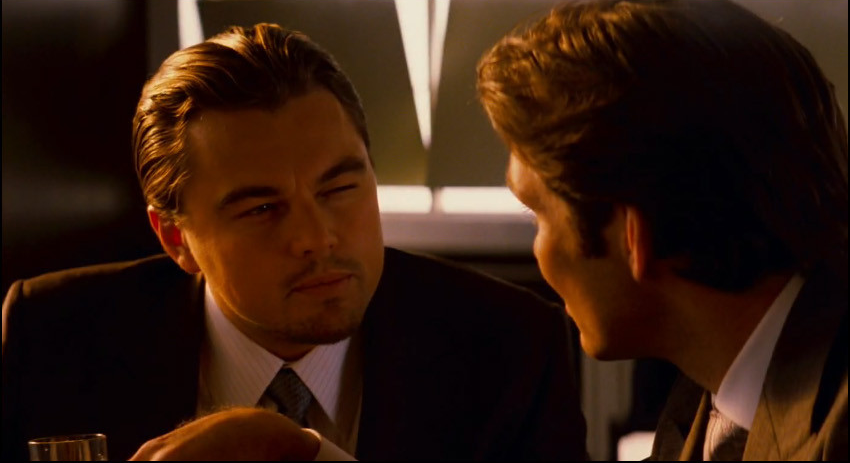

In [49]:
import collections


def gen_lines_test():
    return ["1 2", "2 3", "2 4", "3 1", "4 5", "5 6", "6 4"]


def reverse_head_tail(first, second):
    return second, first


def map_nodes(f, first, second):
    return f[first], f[second]


def identity(first, second):
    return first, second


def get_adj_list(lines, action):
    adj_list = collections.defaultdict(list)
    for line in lines:
        line = [int(i) for i in line.split()]
        tail_vertex, head_vertex = action(line[0], line[1])
        adj_list[tail_vertex].append(head_vertex)
    return adj_list


def dfs_loop(adj_list, nodes_list):
    traverse_order = 0
    curr_leader = 0
    f = []
    leaders = {}
    explored = set()
    for node in nodes_list:
        if node not in explored:
            curr_leader = node
            curr_leader, traverse_order, explored, f, leaders = dfs(adj_list, node, curr_leader, traverse_order, explored, f, leaders)
    return adj_list, f, leaders


def dfs(adj_list, i, curr_leader, traverse_order, explored, f, leaders):
    explored.add(i)
    leaders[i] = curr_leader
    for node in adj_list[i]:
        if node not in explored:
            curr_leader, traverse_order, explored, f, leaders = dfs(adj_list, node, curr_leader, traverse_order, explored, f, leaders)
    f.append(i)
    traverse_order += 1

    return curr_leader, traverse_order, explored, f, leaders

# https://en.wikipedia.org/wiki/Kosaraju%27s_algorithm
rev_adj_list = get_adj_list(gen_lines_test(), reverse_head_tail)
nodes_list = sorted(rev_adj_list.keys(), reverse=True)
a, f, l = dfs_loop(rev_adj_list, nodes_list)
adj_list = get_adj_list(gen_lines_test(), identity)
f.reverse()
a, f, l = dfs_loop(adj_list, f)
scc_dict = collections.defaultdict(lambda: 0)
for i in l.values():
    scc_dict[i] += 1
res = scc_dict.values()
res.sort()
print(dict(scc_dict), res, len(res))

{2: 3, 6: 3} [3, 3] 2


#### Limitations

In [50]:
import sys
import resource
resource.setrlimit(resource.RLIMIT_STACK, (resource.RLIM_INFINITY, resource.RLIM_INFINITY))
sys.setrecursionlimit(10**6)
thread.stack_size(2**27)

ValueError: not allowed to raise maximum limit

#### TCO

In [ ]:
def binary_search(x, lst, low=None, high=None):
    if low == None : low = 0
    if high == None : high = len(lst)-1
    mid = low + (high - low) / 2
    if low > high :
        return None
    elif lst[mid] == x :
        return mid
    elif lst[mid] > x :
        return binary_search(x, lst, low, mid-1)
    else :
        return binary_search(x, lst, mid+1, high)

In [ ]:
def binary_search(x, lst, low=None, high=None) :
  start:
    if low == None : low = 0
    if high == None : high = len(lst)-1
    mid = low + (high - low) // 2
    if low > high :
        return None
    elif lst[mid] == x :
        return mid
    elif lst[mid] > x :
        (x, lst, low, high) = (x, lst, low, mid-1)
        goto start
    else :
        (x, lst, low, high) = (x, lst, mid+1, high)
        goto start

https://godbolt.org/g/VcXaru

#### LEGB

* local
* enclosing
* global
* built-in

In [51]:
def foo():
    x = 4

    def bar():
        print(x)

    bar()
    x = 5
    bar()
    return bar

x = "aaa"
f = foo()
print(x)


4
5
aaa


https://goo.gl/VHvwF5

#### Closures

Замыкание (англ. closure) в программировании — функция первого класса, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся её параметрами. Говоря другим языком, замыкание — функция, которая ссылается на свободные переменные в своей области видимости.

В случае замыкания ссылки на переменные внешней функции действительны внутри вложенной функции до тех пор, пока работает вложенная функция, даже если внешняя функция закончила работу, и переменные вышли из области видимости

Guido: "It is also worth nothing that even though I didn't envision Python as a functional language, the introduction of closures has been useful in the development of many other advanced programming features"

In [3]:
def add_url_rule(rule, endpoint=None, view_func=None, **options):
    return lambda s:  s.add_url_rule(rule, endpoint, view_func, **options)

f = add_url_rule('/<categId>/', 'categoryDisplay', None)
print(dict(zip(f.__code__.co_freevars, (c.cell_contents for c in f.__closure__))))

{'endpoint': 'categoryDisplay', 'options': {}, 'rule': '/<categId>/', 'view_func': None}


#### Late binding

In [53]:
def create_multipliers():
    return [lambda x : i * x for i in range(5)]

for multiplier in create_multipliers():
    print(multiplier(2))

8
8
8
8
8


In [54]:
def create_multipliers():
    return [lambda x, i=i : i * x for i in range(5)]

### Summary

* Python не функциональный язык
* functions are first-class citizens
* Рекурсия хороша, в основном, на собеседованиях
* closure крайне полезны (теже декораторы), но стоит помнить про late binding

### References

* http://www.kylem.net/programming/tailcall.html
* https://docs.python.org/2/reference/datamodel.html (ctrl+F "\__closure\__")
* http://www.ostricher.com/2014/10/on-python-closures/
* http://neopythonic.blogspot.ru/2009/04/tail-recursion-elimination.html
* http://www.ostricher.com/2014/10/on-python-closures/

## Decorators

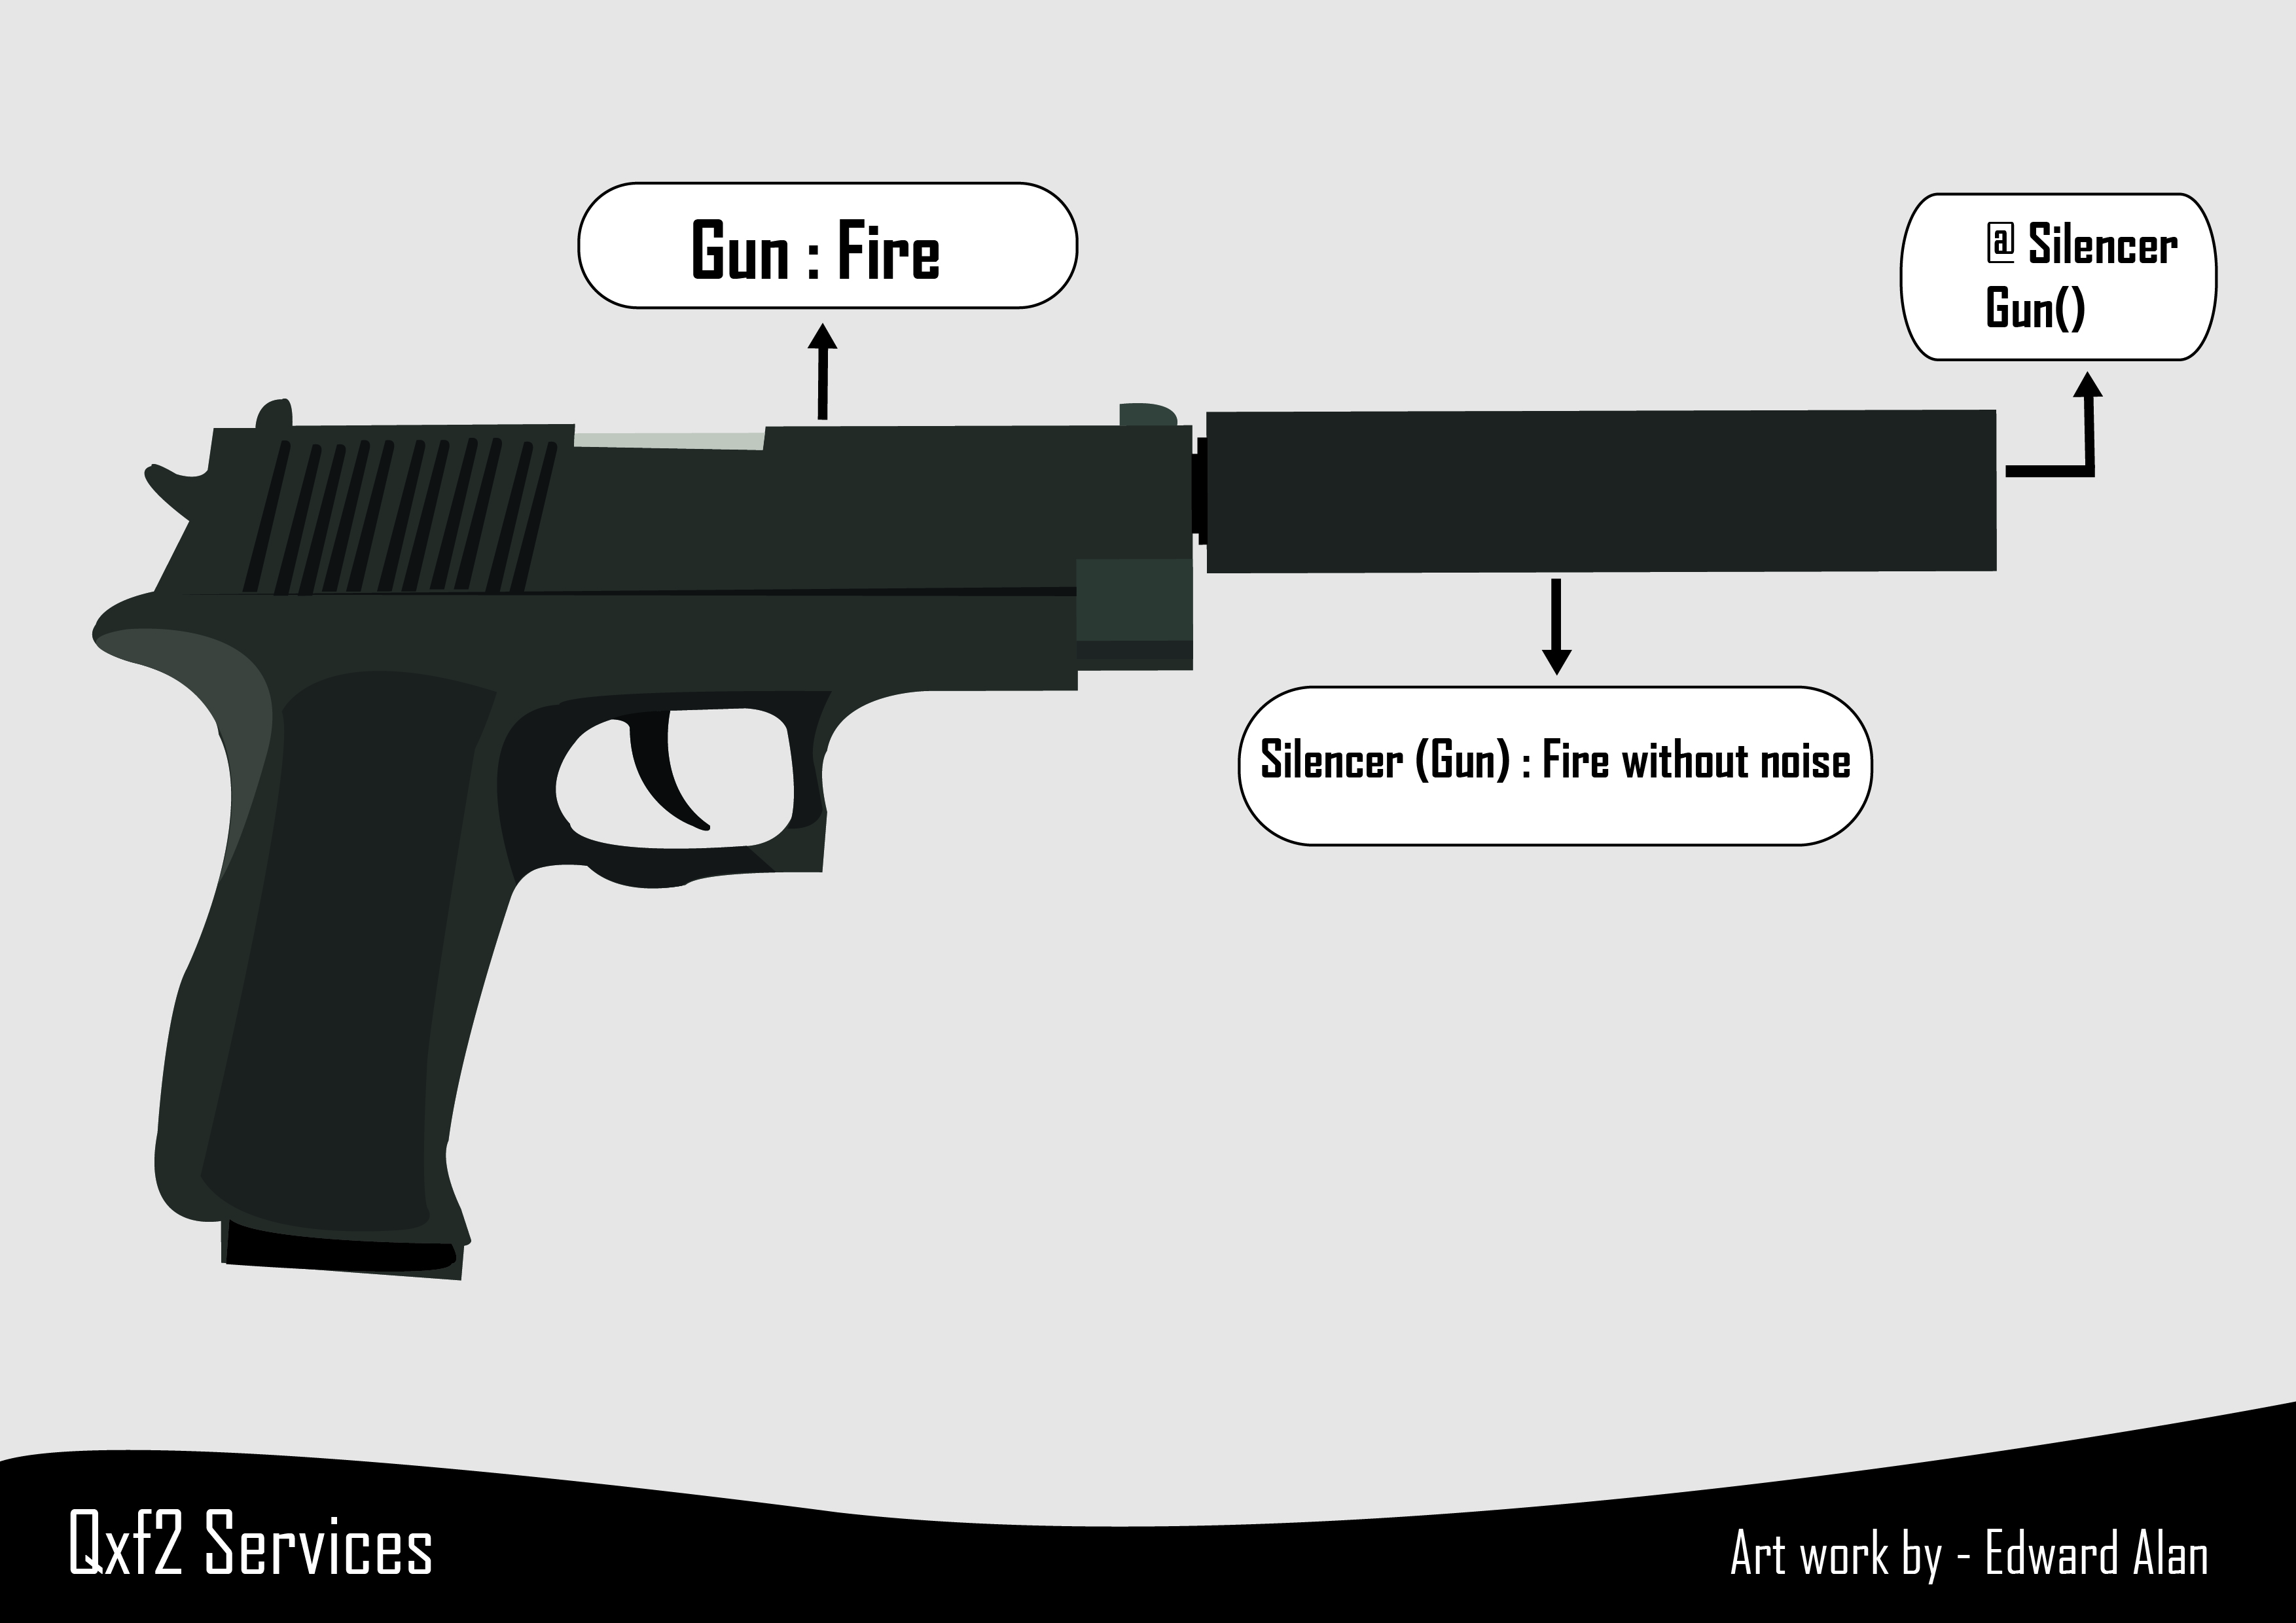

#### Passing arguments

In [55]:
def decorator(func):
    def wrapper(*args, **kwargs):
        print("args: ", args, " kwargs:", kwargs)
        func(*args, **kwargs)
    return wrapper
 
@decorator
def f(a, b, c, platypus="Why not?"):
    print(a, b, c, platypus)

# f = decorator(f)

f("Bill", "Linus", "Stieve", platypus="Homer!")

args:  ('Bill', 'Linus', 'Stieve')  kwargs: {'platypus': 'Homer!'}
Bill Linus Stieve Homer!


#### Decorator class

In [56]:
class deprecated(object):
    def __call__(self, func):
        self.func = func
        self.count = 0
        return self._wrapper
    def _wrapper(self, *args, **kwargs):
        self.count += 1
        if self.count == 1:
            print(self.func.__name__, 'is deprecated')
        return self.func(*args, **kwargs)

@deprecated()
def f():
    pass
# f = deprecated()(f)

f()

f is deprecated


#### Standard decorators

In [58]:
class ScreamingWordProcessor(object):
    PLUGINS = []
    def process(self, text):
        for plugin in self.PLUGINS:
            text = plugin().cleanup(text)
        return text

    @staticmethod
    def scream(msg):
        print(msg + '!')
    
    @classmethod
    def plugin(cls, plugin):
        cls.PLUGINS.append(plugin)

@ScreamingWordProcessor.plugin
class CleanMdashesExtension(object):
    def cleanup(self, text):
        return text.replace('&mdash;', u'\N{em dash}')

ScreamingWordProcessor.scream("Damn")

Damn!


#### Decorator with arguments

In [59]:
def decorator_maker(decorator_arg1, decorator_arg2):
    print("Decorator make args:", decorator_arg1, decorator_arg2)
    def decorator(func):
        print "Decorator args:", decorator_arg1, decorator_arg2
        def wrapper(*args, **kwargs) :
            print("Wrapper args:", args, kwargs)
            return func(*args, **kwargs)
 
        return wrapper
 
    return decorator
 
@decorator_maker("Tesla", "SpaceX")
def f(arg1, arg2):
    print("Function args:", arg1, arg2)

f("Neuralink", "Solar")

Decorator make args: Tesla SpaceX
Decorator args: Tesla SpaceX
Wrapper args: ('Neuralink', 'Solar') {}
Function args: Neuralink Solar


#### Multiple decorators

In [3]:
def benchmark(func):
    import time
    def wrapper(*args, **kwargs):
        t = time.clock()
        res = func(*args, **kwargs)
        print(func.__name__, time.clock() - t)
        return res
    return wrapper


def logging(func):
    def wrapper(*args, **kwargs):
        res = func(*args, **kwargs)
        print(func.__name__, args, kwargs)
        return res
    return wrapper
 
def counter(func):
    def wrapper(*args, **kwargs):
        wrapper.count += 1
        res = func(*args, **kwargs)
        print("%s called with: %s" % (func.__name__, wrapper.count))
        return res
    wrapper.count = 0
    return wrapper
 

@benchmark
@logging
@counter
def reverse_string(string):
    return string[::-1]

print(reverse_string("Red rum, sir, is murder"))

reverse_string called with: 1
wrapper ('Red rum, sir, is murder',) {}
wrapper 0.005435
redrum si ,ris ,mur deR


#### functools

In [61]:
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(self, *args, **kwargs):
        start_time = time.time()
        called_func = func._original if hasattr(func, '_original') and not DEBUG else func
        result = called_func(self, *args, **kwargs)
        end_time = time.time()
        logging.info('%s took: %.3f sec' % (func.__name__, end_time - start_time))
        return result
    return wrapper


def mockable(func):
    @wraps(func)
    def wrapper(self, *args, **kwargs):
        func_name = func.__name__ + '_mock' if DEBUG else func.__name__
        result = getattr(self, func_name)(*args, **kwargs)
        return result
    wrapper._original = func
    return wrapper


class Photographer(object):
    @timeit
    @mockable
    def get_banners(self):
        url = conf.photographer.get_banners_url + "?server_name=%s" % conf.photographer.server_name
        try:
            result = self.request(url)
            result = json.loads(result)
        except ValueError:
            result = []
        return [Banner(b) for b in result]

    def get_banners_mock(self):
        banners = [
            {"viewpages": ["http://mail.ru/"], "gender": [0, 1, 2], "age": [], "task_id": "abc123", "geo": [42], "id": 26554477, "slot_id": 42, "desc": "inbox", "campaign_id": 42},    
        ]
        return [Banner(b) for b in banners]

### Summary

* decorators are cool!

### Refernces

* https://habrahabr.ru/post/141501/
* https://www.youtube.com/watch?v=9oyr0mocZTg
* http://www.scipy-lectures.org/advanced/advanced_python/#decorators